# COVID-19 Journal Classification using Machine Learning Techniques<br>
## Team Members:<br>
1.Yerramaddu Jahnavi - 181CO260 <br>
2.Swathi J S - 181CO155

The main aim of our system is to classify the abstracts related to covid with their respective journals so that a researcher can refer to articles of his interest from the required journals instead of searching all the articles.

### Importing the necessary libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import future

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

### Data Description | Loading the dataset 

In [2]:
data = pd.read_csv("metadata.csv")

C:\Users\Swathi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.shape

(490904, 19)

In [4]:
data.head(10)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
5,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...,NaN
6,5yhe786e,3bb07ea10432f7738413dff9816809cc90f03f99,PMC,Debate: Transfusing to normal haemoglobin leve...,10.1186/cc987,PMC137267,11299062,no-cc,Recent evidence suggests that critically ill p...,2001-03-08,"Alvarez, Gonzalo; Hébert, Paul C; Szick, Sharyn",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/3bb07ea10432f7738413d...,document_parses/pmc_json/PMC137267.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
7,8zchiykl,5806726a24dc91de3954001effbdffd7a82d54e2,PMC,The 21st International Symposium on Intensive ...,10.1186/cc1013,PMC137274,11353930,no-cc,The 21st International Symposium on Intensive ...,2001-05-02,"Ball, Jonathan; Venn, Richard",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/5806726a24dc91de39540...,document_parses/pmc_json/PMC137274.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
8,8qnrcgnk,faaf1022ccfe93b032c5608097a53543ba24aedb,PMC,Heme oxygenase-1 and carbon monoxide in pulmon...,10.1186/1465-9921-4-7,PMC193681,12964953,no-cc,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-08-07,"Slebos, Dirk-Jan; Ryter, Stefan W; Choi, Augus...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/faaf1022ccfe93b032c56...,document_parses/pmc_json/PMC193681.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
9,jg13scgo,5b44feca5d6ffaaeb6

In [5]:
data['source_x'].value_counts()

WHO                                    195986
Medline                                 95739
Medline; PMC                            80474
PMC                                     46072
Elsevier; Medline; PMC                  41022
MedRxiv; WHO                             9484
Elsevier; PMC                            6863
ArXiv                                    6015
BioRxiv; WHO                             2210
BioRxiv                                  1471
MedRxiv                                  1140
Medline; PMC; WHO                         931
MedRxiv; Medline; PMC; WHO                586
BioRxiv; Medline; PMC; WHO                396
Elsevier                                  380
Elsevier; Medline; PMC; WHO               305
MedRxiv; Medline; WHO                     289
BioRxiv; MedRxiv                          246
BioRxiv; Medline; WHO                     243
ArXiv; Medline; PMC                       225
Medline; WHO                              220
ArXiv; Medline                    

In [6]:
data.dtypes

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

In [7]:
data['journal'].value_counts()

bioRxiv                                     4773
PLoS One                                    4398
BMJ                                         4246
Sci Rep                                     2057
Nature                                      2015
                                            ... 
Tourismus und Klimawandel                      1
Nutrients, Stress, and Medical Disorders       1
Acta Med. Iran.                                1
Diagnostic Imaging: Pediatrics                 1
Arch. Pediatr.                                 1
Name: journal, Length: 34523, dtype: int64

In [8]:
filt = (data['journal'] =='bioRxiv') | (data['journal'] == 'PLoS One') | (data['journal'] == 'BMJ')
updated_df = data.loc[filt,['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id']]
updated_df.to_csv('./data3.csv', index = False)


In [9]:
data_filtered=pd.read_csv("data3.csv")

In [10]:
data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,"Malpica, José M.; Sacristán, Soledad; Fraile, ...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/c64f525d77bf8b2ae4439...,document_parses/pmc_json/PMC1762347.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,"Klinkenberg, Don; Fraser, Christophe; Heesterb...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/6af02873a430f5f75dc56...,document_parses/pmc_json/PMC1762362.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,"Caley, Peter; Becker, Niels G.; Philp, David J.",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/9b7a0ad7b6c7f59e7a6cf...,document_parses/pmc_json/PMC1764036.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,"Garske, Tini; Clarke, Paul; Ghani, Azra C.",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/d882f79283751d6c7f2e4...,document_parses/pmc_json/PMC1831494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,"Catic, André; Misaghi, Shahram; Korbel, Gregor...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/305cf1019ca9c81126b2e...,document_parses/pmc_json/PMC1847702.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN


In [11]:
data_filtered['journal'].value_counts()

bioRxiv     4773
PLoS One    4398
BMJ         4246
Name: journal, dtype: int64

In [12]:
data_filtered.shape

(13417, 19)

In [13]:
data_filtered.dtypes

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id           float64
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

### Language Detection Module

In [14]:
from langdetect import detect
language = []
for i in data_filtered['title']:
    language.append(detect(i))
data_filtered['Title Language']=language

In [15]:
data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,Title Language
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,"Malpica, José M.; Sacristán, Soledad; Fraile, ...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/c64f525d77bf8b2ae4439...,document_parses/pmc_json/PMC1762347.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,"Klinkenberg, Don; Fraser, Christophe; Heesterb...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/6af02873a430f5f75dc56...,document_parses/pmc_json/PMC1762362.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,"Caley, Peter; Becker, Niels G.; Philp, David J.",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/9b7a0ad7b6c7f59e7a6cf...,document_parses/pmc_json/PMC1764036.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,"Garske, Tini; Clarke, Paul; Ghani, Azra C.",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/d882f79283751d6c7f2e4...,document_parses/pmc_json/PMC1831494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,"Catic, André; Misaghi, Shahram; Korbel, Gregor...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/305cf1019ca9c81126b2e...,document_parses/pmc_json/PMC1847702.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en


In [16]:
data_filtered['Title Language'].value_counts()

en    13282
it       33
ca       31
fr       20
ro       11
es       10
de        6
nl        4
pt        3
af        3
sv        2
no        2
cy        2
sw        1
vi        1
sq        1
da        1
pl        1
tl        1
so        1
id        1
Name: Title Language, dtype: int64

In [17]:
data_filtered['abstract'] = data_filtered['abstract'].apply(str)

In [18]:
language = []
for i in data_filtered['abstract']:
    language.append(detect(i))
data_filtered['Abstract Language']=language

In [19]:
data_filtered['Abstract Language'].value_counts()

en    9451
tl    3966
Name: Abstract Language, dtype: int64

In [20]:
filt = (data_filtered['Abstract Language'] =='en')
updated_df = data_filtered.loc[filt,data_filtered.columns]
updated_df.to_csv('./data4.csv', index = False)

In [21]:
english_data_filtered = pd.read_csv("data4.csv")

In [22]:
english_data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,Title Language,Abstract Language
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,...,PLoS One,NaN,NaN,NaN,document_parses/pdf_json/c64f525d77bf8b2ae4439...,document_parses/pmc_json/PMC1762347.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en,en
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,...,PLoS One,NaN,NaN,NaN,document_parses/pdf_json/6af02873a430f5f75dc56...,document_parses/pmc_json/PMC1762362.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en,en
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,...,PLoS One,NaN,NaN,NaN,document_parses/pdf_json/9b7a0ad7b6c7f59e7a6cf...,document_parses/pmc_json/PMC1764036.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en,en
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,...,PLoS One,NaN,NaN,NaN,document_parses/pdf_json/d882f79283751d6c7f2e4...,document_parses/pmc_json/PMC1831494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en,en
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,...,PLoS One,NaN,NaN,NaN,document_parses/pdf_json/305cf1019ca9c81126b2e...,document_parses/pmc_json/PMC1847702.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,en,en


In [23]:
english_data_filtered['Title Language'].value_counts()

en    9383
it      21
ca      20
ro       6
fr       5
de       5
es       3
no       2
id       1
sq       1
cy       1
nl       1
af       1
pt       1
Name: Title Language, dtype: int64

### Named Recognisation Entity

In [24]:
import spacy
from spacy import displacy
from collections import Counter
ner = spacy.load("en_core_web_lg")

In [25]:
## tag text
txt = english_data_filtered["abstract"].iloc[1]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [26]:
import collections

In [27]:
## tag text and exctract tags into a list
english_data_filtered["tags"] = english_data_filtered["abstract"].apply(lambda x: [(tag.text, tag.label_) for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
english_data_filtered["tags"] = english_data_filtered["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in english_data_filtered["tags"].tolist():
     for dic in lst:
            for k in dic.keys():
                tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
    english_data_filtered["tags_"+feature] = english_data_filtered["tags"].apply(lambda x: utils_ner_features(x, feature))

## print result
english_data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,tags_PERSON,tags_LOC,tags_FAC,tags_WORK_OF_ART,tags_EVENT,tags_LANGUAGE,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,...,0,0,0,0,0,0,0,0,0,0
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,...,0,0,0,0,0,0,0,0,0,0
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,...,0,0,0,0,0,0,0,0,0,0
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,...,3,0,0,0,0,0,0,0,0,0
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,...,3,0,0,0,0,0,0,12,0,0


In [28]:
english_data_filtered['tags_CARDINAL']

0        2
1        4
2        1
3        7
4        1
        ..
9446     2
9447     2
9448    19
9449     0
9450     6
Name: tags_CARDINAL, Length: 9451, dtype: int64

### Data Cleaning 

In [29]:
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def CleanText(raw_text, remove_stopwords=True, stemming= False, flg_lemm=True, split_text=True):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        #stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        words = [lem.lemmatize(word) for word in words]
    
    return(words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Swathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
cleaned_abstract=[]
for i in english_data_filtered['abstract']:
    cleaned_abstract.append(CleanText(i))
english_data_filtered['Cleaned Abstract']=cleaned_abstract
english_data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,tags_LOC,tags_FAC,tags_WORK_OF_ART,tags_EVENT,tags_LANGUAGE,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP,Cleaned Abstract
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,...,0,0,0,0,0,0,0,0,0,"[distribution, multi, host, pathogen, host, ra..."
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,...,0,0,0,0,0,0,0,0,0,"[background, contact, tracing, play, important..."
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,...,0,0,0,0,0,0,0,0,0,"[background, time, delay, start, influenza, pa..."
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,...,0,0,0,0,0,0,0,0,0,"[background, increased, occurrence, outbreak, ..."
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,...,0,0,0,0,0,0,12,0,0,"[background, ubiquitin, ubiquitin, like, prote..."


In [31]:
english_data_filtered['Cleaned Abstract']

0       [distribution, multi, host, pathogen, host, ra...
1       [background, contact, tracing, play, important...
2       [background, time, delay, start, influenza, pa...
3       [background, increased, occurrence, outbreak, ...
4       [background, ubiquitin, ubiquitin, like, prote...
                              ...                        
9446    [objective, study, aimed, ass, performance, co...
9447    [chronic, hcv, infection, treatment, failure, ...
9448    [background, aim, coronavirus, disease, covid,...
9449    [evolutionary, process, genetic, recombination...
9450    [present, rapid, versatile, method, capturing,...
Name: Cleaned Abstract, Length: 9451, dtype: object

In [32]:
sen = []
for i in english_data_filtered['Cleaned Abstract']:
    sentence = " "
    new = " "
    for j in i:
        sentence += (j + new)
    sen.append(sentence)
english_data_filtered['Cleaned Abstract']=sen

In [33]:
english_data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,tags_LOC,tags_FAC,tags_WORK_OF_ART,tags_EVENT,tags_LANGUAGE,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP,Cleaned Abstract
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,...,0,0,0,0,0,0,0,0,0,distribution multi host pathogen host range c...
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,...,0,0,0,0,0,0,0,0,0,background contact tracing play important rol...
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,...,0,0,0,0,0,0,0,0,0,background time delay start influenza pandemi...
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,...,0,0,0,0,0,0,0,0,0,background increased occurrence outbreak h n ...
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,...,0,0,0,0,0,0,12,0,0,background ubiquitin ubiquitin like protein u...


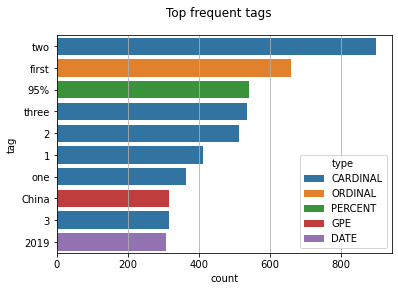

In [34]:
#PLoS One - Most Frequent Tags in "PLoS One" Journal Abstract
import seaborn as sns
tags_list = english_data_filtered[english_data_filtered["journal"]=="PLoS One"]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
english_data_filtered_tags = pd.DataFrame(map_lst, columns=['tag','type'])
english_data_filtered_tags["count"] = 1
english_data_filtered_tags = english_data_filtered_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=english_data_filtered_tags.iloc[:10,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

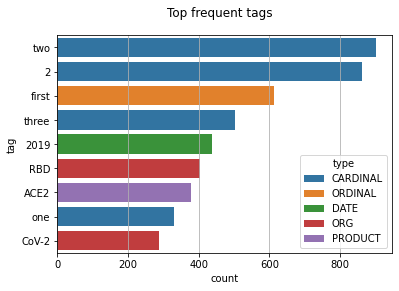

In [35]:
#bioRxiv - Most Frequent Tags in "bioRxiv" Journal Abstract
import seaborn as sns
tags_list = english_data_filtered[english_data_filtered["journal"]=="bioRxiv"]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
english_data_filtered_tags = pd.DataFrame(map_lst, columns=['tag','type'])
english_data_filtered_tags["count"] = 1
english_data_filtered_tags = english_data_filtered_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=english_data_filtered_tags.iloc[:10,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

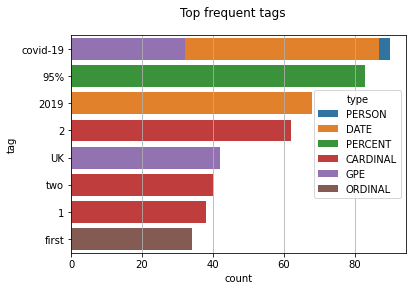

In [37]:
#Nature - Most Frequent Tags in "Nature" Journal Abstract
import seaborn as sns
tags_list = english_data_filtered[english_data_filtered["journal"]=="BMJ"]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
english_data_filtered_tags = pd.DataFrame(map_lst, columns=['tag','type'])
english_data_filtered_tags["count"] = 1
english_data_filtered_tags = english_data_filtered_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=english_data_filtered_tags.iloc[:10,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

### Length Analysis

In [38]:
english_data_filtered['word_count'] = english_data_filtered["Cleaned Abstract"].apply(lambda x: len(str(x).split(" ")))
english_data_filtered['char_count'] = english_data_filtered["Cleaned Abstract"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
english_data_filtered['sentence_count'] = english_data_filtered["Cleaned Abstract"].apply(lambda x: len(str(x).split(".")))
english_data_filtered['avg_word_length'] = english_data_filtered['char_count'] / english_data_filtered['word_count']
english_data_filtered['avg_sentence_length'] = english_data_filtered['word_count'] / english_data_filtered['sentence_count']
english_data_filtered.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP,Cleaned Abstract,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,rr2wwvue,c64f525d77bf8b2ae4439a875f1bd8eb197a0519,PMC,Association and Host Selectivity in Multi-Host...,10.1371/journal.pone.0000041,PMC1762347,17183670.0,cc-by,The distribution of multi-host pathogens over ...,2006-12-20,...,0,0,0,0,distribution multi host pathogen host range c...,126,835,1,6.626984,126.0
1,1n0rg5vd,6af02873a430f5f75dc56a917f26feaea89b8e79,PMC,The Effectiveness of Contact Tracing in Emergi...,10.1371/journal.pone.0000012,PMC1762362,17183638.0,cc-by,BACKGROUND: Contact tracing plays an important...,2006-12-20,...,0,0,0,0,background contact tracing play important rol...,140,1039,1,7.421429,140.0
2,nzh87aux,9b7a0ad7b6c7f59e7a6cf1dc9d07912a273d19b5,PMC,The Waiting Time for Inter-Country Spread of P...,10.1371/journal.pone.0000143,PMC1764036,17206278.0,cc-by,BACKGROUND: The time delay between the start o...,2007-01-03,...,0,0,0,0,background time delay start influenza pandemi...,182,1263,1,6.939560,182.0
3,x2zq0lnt,d882f79283751d6c7f2e48cb991ee8abbcd913ae,PMC,The Transmissibility of Highly Pathogenic Avia...,10.1371/journal.pone.0000349,PMC1831494,17406673.0,cc-by,BACKGROUND: With the increased occurrence of o...,2007-04-04,...,0,0,0,0,background increased occurrence outbreak h n ...,129,908,1,7.038760,129.0
4,s4y6uxsb,305cf1019ca9c81126b2e527fedf79969c2c522f,PMC,"ElaD, a Deubiquitinating Protease Expressed by...",10.1371/journal.pone.0000381,PMC1847702,17440617.0,cc-by,BACKGROUND: Ubiquitin and ubiquitin-like prote...,2007-04-18,...,0,12,0,0,background ubiquitin ubiquitin like protein u...,140,1042,1,7.442857,140.0


C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

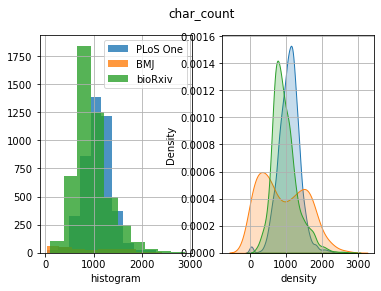

In [39]:
import seaborn as sns
x, y = "char_count", "journal"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in english_data_filtered[y].unique():
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(english_data_filtered[y].unique())
ax[1].grid(True)
plt.show()

C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

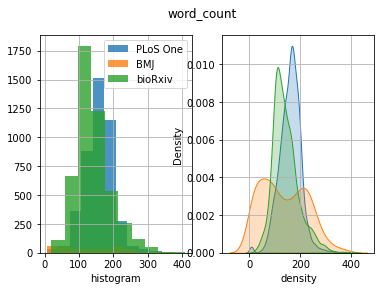

In [40]:
x, y = "word_count", "journal"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in english_data_filtered[y].unique():
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(english_data_filtered[y].unique())
ax[1].grid(True)
plt.show()

C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

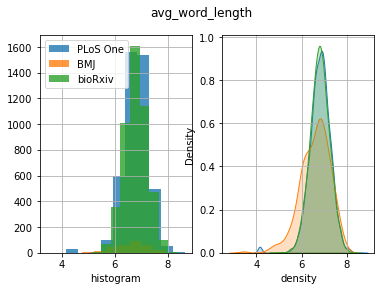

In [41]:
x, y = "avg_word_length", "journal"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in english_data_filtered[y].unique():
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(english_data_filtered[y].unique())
ax[1].grid(True)
plt.show()

C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Swathi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

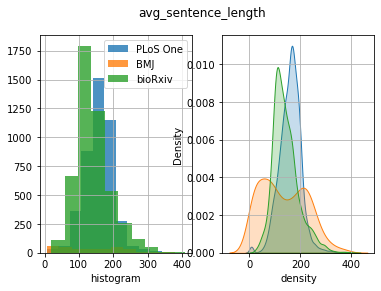

In [42]:
x, y = "avg_sentence_length", "journal"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in english_data_filtered[y].unique():
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(english_data_filtered[english_data_filtered[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(english_data_filtered[y].unique())
ax[1].grid(True)
plt.show()

### Word Frequency 

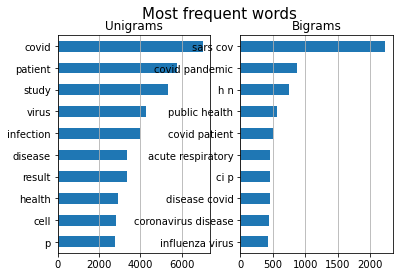

In [44]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
#PLoS One
corpus = english_data_filtered[english_data_filtered["journal"]=="PLoS One"]["Cleaned Abstract"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
english_data_filtered_uni_PLoSOne = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
english_data_filtered_uni_PLoSOne.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
english_data_filtered_bi_PLoSOne = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
english_data_filtered_bi_PLoSOne["Word"] = english_data_filtered_bi_PLoSOne["Word"].apply(lambda x: " ".join(
                   string for string in x) )
english_data_filtered_bi_PLoSOne.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

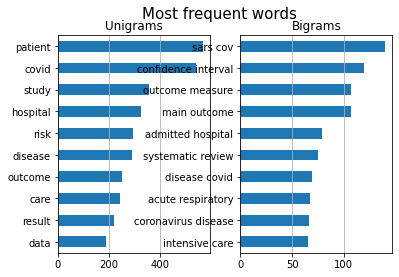

In [45]:
#BMJ
corpus = english_data_filtered[english_data_filtered["journal"]=="BMJ"]["Cleaned Abstract"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
english_data_filtered_uni_BMJ = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
english_data_filtered_uni_BMJ.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
english_data_filtered_bi_BMJ = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
english_data_filtered_bi_BMJ["Word"] = english_data_filtered_bi_BMJ["Word"].apply(lambda x: " ".join(
                   string for string in x) )
english_data_filtered_bi_BMJ.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

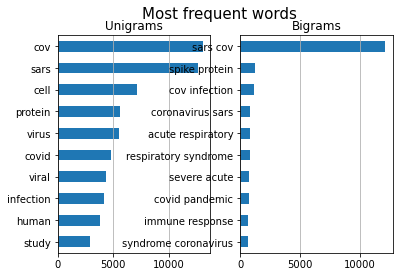

In [46]:
#bioRxiv
corpus = english_data_filtered[english_data_filtered["journal"]=="bioRxiv"]["Cleaned Abstract"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
english_data_filtered_uni_bioRxiv = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
english_data_filtered_uni_bioRxiv.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
english_data_filtered_bi_bioRxiv = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
english_data_filtered_bi_bioRxiv["Word"] = english_data_filtered_bi_bioRxiv["Word"].apply(lambda x: " ".join(
                   string for string in x) )
english_data_filtered_bi_bioRxiv.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

### Word Count

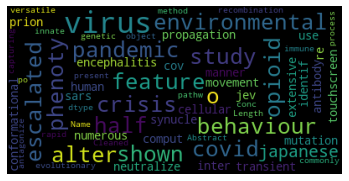

In [48]:
from wordcloud import WordCloud
wc = WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
corpus = english_data_filtered[english_data_filtered["journal"]=="bioRxiv"]["Cleaned Abstract"]
wc_bioRxiv = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

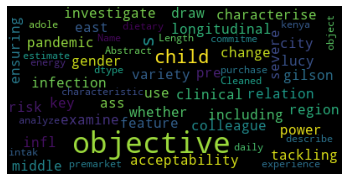

In [50]:
wc = WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
corpus = english_data_filtered[english_data_filtered["journal"]=="BMJ"]["Cleaned Abstract"]
wc_BMJ = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

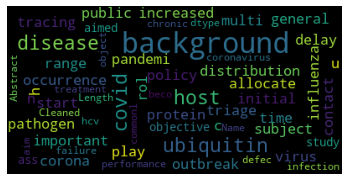

In [51]:
wc = WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
corpus = english_data_filtered[english_data_filtered["journal"]=="PLoS One"]["Cleaned Abstract"]
wc_PLoSOne = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

### Text Preprocessing 

In [52]:
english_data_filtered.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'Title Language', 'Abstract Language', 'tags',
       'tags_QUANTITY', 'tags_PERCENT', 'tags_TIME', 'tags_CARDINAL',
       'tags_DATE', 'tags_ORDINAL', 'tags_GPE', 'tags_LAW', 'tags_PERSON',
       'tags_LOC', 'tags_FAC', 'tags_WORK_OF_ART', 'tags_EVENT',
       'tags_LANGUAGE', 'tags_MONEY', 'tags_ORG', 'tags_PRODUCT', 'tags_NORP',
       'Cleaned Abstract', 'word_count', 'char_count', 'sentence_count',
       'avg_word_length', 'avg_sentence_length'],
      dtype='object')

In [53]:
dtf= english_data_filtered.drop(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id','license', 'abstract', 'publish_time', 'authors','mag_id','who_covidence_id','arxiv_id','pdf_json_files','pmc_json_files','url','s2_id','Title Language'] , axis=1)

In [54]:
dtf.head()

,journal,Abstract Language,tags,tags_QUANTITY,tags_PERCENT,tags_TIME,tags_CARDINAL,tags_DATE,tags_ORDINAL,tags_GPE,...,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP,Cleaned Abstract,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,PLoS One,en,"[{('five', 'CARDINAL'): 1}, {('21', 'CARDINAL'...",0,0,0,2,0,0,0,...,0,0,0,0,distribution multi host pathogen host range c...,126,835,1,6.626984,126.0
1,PLoS One,en,"[{('1', 'CARDINAL'): 1}, {('2', 'CARDINAL'): 1...",0,0,0,4,0,0,0,...,0,0,0,0,background contact tracing play important rol...,140,1039,1,7.421429,140.0
2,PLoS One,en,"[{('two', 'CARDINAL'): 1}, {('several months',...",0,0,0,1,4,0,0,...,0,0,0,0,background time delay start influenza pandemi...,182,1263,1,6.939560,182.0
3,PLoS One,en,"[{('HPAI', 'PERSON'): 3}, {('four', 'CARDINAL'...",0,0,0,7,0,0,0,...,0,0,0,0,background increased occurrence outbreak h n ...,129,908,1,7.038760,129.0
4,PLoS One,en,"[{('ULP', 'ORG'): 3}, {('SENP', 'ORG'): 3}, {(...",0,0,0,1,0,0,3,...,0,12,0,0,background ubiquitin ubiquitin like protein u...,140,1042,1,7.442857,140.0


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dtf['y'] = le.fit_transform(dtf['journal'])

In [56]:
dtf.head()

,journal,Abstract Language,tags,tags_QUANTITY,tags_PERCENT,tags_TIME,tags_CARDINAL,tags_DATE,tags_ORDINAL,tags_GPE,...,tags_ORG,tags_PRODUCT,tags_NORP,Cleaned Abstract,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,y
0,PLoS One,en,"[{('five', 'CARDINAL'): 1}, {('21', 'CARDINAL'...",0,0,0,2,0,0,0,...,0,0,0,distribution multi host pathogen host range c...,126,835,1,6.626984,126.0,1
1,PLoS One,en,"[{('1', 'CARDINAL'): 1}, {('2', 'CARDINAL'): 1...",0,0,0,4,0,0,0,...,0,0,0,background contact tracing play important rol...,140,1039,1,7.421429,140.0,1
2,PLoS One,en,"[{('two', 'CARDINAL'): 1}, {('several months',...",0,0,0,1,4,0,0,...,0,0,0,background time delay start influenza pandemi...,182,1263,1,6.939560,182.0,1
3,PLoS One,en,"[{('HPAI', 'PERSON'): 3}, {('four', 'CARDINAL'...",0,0,0,7,0,0,0,...,0,0,0,background increased occurrence outbreak h n ...,129,908,1,7.038760,129.0,1
4,PLoS One,en,"[{('ULP', 'ORG'): 3}, {('SENP', 'ORG'): 3}, {(...",0,0,0,1,0,0,3,...,12,0,0,background ubiquitin ubiquitin like protein u...,140,1042,1,7.442857,140.0,1


In [57]:
dtf['y'].value_counts()

2    4772
1    4384
0     295
Name: y, dtype: int64

In [58]:
dtf['journal'].value_counts()

bioRxiv     4772
PLoS One    4384
BMJ          295
Name: journal, dtype: int64

In [59]:
dtf=dtf.drop(['sentence_count'],axis=1)

In [60]:
dtf.describe()

,tags_QUANTITY,tags_PERCENT,tags_TIME,tags_CARDINAL,tags_DATE,tags_ORDINAL,tags_GPE,tags_LAW,tags_PERSON,tags_LOC,...,tags_LANGUAGE,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP,word_count,char_count,avg_word_length,avg_sentence_length,y
count,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,...,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000
mean,0.111628,1.395196,0.089303,4.065919,1.361866,0.258385,0.969950,0.007512,0.995239,0.150037,...,0.006560,0.063062,4.133848,0.480161,0.348429,149.273410,1013.482489,6.776337,149.273410,1.473706
std,0.545422,3.265289,0.424467,4.913860,2.340859,0.677142,1.947063,0.092277,1.667644,0.677784,...,0.094052,0.371528,4.460404,1.128985,0.972512,49.860682,345.503186,0.463171,49.860682,0.558363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,24.000000,3.428571,6.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,115.000000,778.000000,6.500000,115.000000,1.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,147.000000,997.000000,6.792208,147.000000,2.000000
75%,0.000000,1.000000,0.000000,6.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,179.000000,1211.000000,7.073082,179.000000,2.000000
max,13.000000,37.000000,10.000000,66.000000,29.000000,13.000000,29.000000,3.000000,15.000000,21.000000,...,3.000000,8.000000,40.000000,13.000000,17.000000,409.000000,2886.000000,8.638037,409.000000,2.000000


In [61]:
dtf.head()

,journal,Abstract Language,tags,tags_QUANTITY,tags_PERCENT,tags_TIME,tags_CARDINAL,tags_DATE,tags_ORDINAL,tags_GPE,...,tags_MONEY,tags_ORG,tags_PRODUCT,tags_NORP,Cleaned Abstract,word_count,char_count,avg_word_length,avg_sentence_length,y
0,PLoS One,en,"[{('five', 'CARDINAL'): 1}, {('21', 'CARDINAL'...",0,0,0,2,0,0,0,...,0,0,0,0,distribution multi host pathogen host range c...,126,835,6.626984,126.0,1
1,PLoS One,en,"[{('1', 'CARDINAL'): 1}, {('2', 'CARDINAL'): 1...",0,0,0,4,0,0,0,...,0,0,0,0,background contact tracing play important rol...,140,1039,7.421429,140.0,1
2,PLoS One,en,"[{('two', 'CARDINAL'): 1}, {('several months',...",0,0,0,1,4,0,0,...,0,0,0,0,background time delay start influenza pandemi...,182,1263,6.939560,182.0,1
3,PLoS One,en,"[{('HPAI', 'PERSON'): 3}, {('four', 'CARDINAL'...",0,0,0,7,0,0,0,...,0,0,0,0,background increased occurrence outbreak h n ...,129,908,7.038760,129.0,1
4,PLoS One,en,"[{('ULP', 'ORG'): 3}, {('SENP', 'ORG'): 3}, {(...",0,0,0,1,0,0,3,...,0,12,0,0,background ubiquitin ubiquitin like protein u...,140,1042,7.442857,140.0,1


In [62]:
dtf=dtf.drop(['char_count'],axis=1)

In [63]:
#Bigrams
english_data_filtered_bi_bioRxiv

,Word,Freq
0,sars cov,12157
1,spike protein,1262
2,cov infection,1165
3,coronavirus sars,839
4,acute respiratory,814
...,...,...
374558,sample ml,1
374559,ml negative,1
374560,negative transport,1
374561,medium observed,1


### Feature Engineering 

Tf-idf weight is composed by two terms: The first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.<br>

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)<br>
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
abstract_text = list(dtf['Cleaned Abstract'].values)
vect_word = TfidfVectorizer(max_features=10000, analyzer='word', stop_words='english', ngram_range=(1,2), dtype=np.float32) 
vect_word.fit(abstract_text)
tfidf_complete = vect_word.transform(abstract_text)

In [65]:
print(tfidf_complete)

  (0, 9908)	0.04975835
  (0, 9759)	0.059641298
  (0, 9738)	0.12886298
  (0, 9429)	0.043495562
  (0, 9200)	0.03904003
  (0, 9060)	0.10628954
  (0, 9046)	0.071850896
  (0, 8848)	0.04186626
  (0, 8835)	0.05784902
  (0, 8717)	0.03670613
  (0, 8703)	0.044444866
  (0, 8677)	0.03505867
  (0, 8499)	0.040847916
  (0, 8291)	0.031780645
  (0, 8270)	0.062237613
  (0, 8133)	0.1144714
  (0, 7730)	0.036022
  (0, 7529)	0.06334375
  (0, 7353)	0.077734545
  (0, 7342)	0.05275439
  (0, 7208)	0.03250596
  (0, 7110)	0.04850021
  (0, 6960)	0.05637486
  (0, 6956)	0.045252156
  (0, 6821)	0.056513775
  :	:
  (9450, 2440)	0.17543374
  (9450, 2365)	0.12543923
  (9450, 2196)	0.0825306
  (9450, 2195)	0.05550278
  (9450, 2155)	0.0789643
  (9450, 2152)	0.062504
  (9450, 2010)	0.0735678
  (9450, 1904)	0.09186975
  (9450, 1898)	0.0661202
  (9450, 1862)	0.075119406
  (9450, 1824)	0.082160525
  (9450, 1823)	0.062504
  (9450, 1673)	0.042198937
  (9450, 1582)	0.075974695
  (9450, 1541)	0.0792493
  (9450, 1540)	0.0771341
  

In [66]:
tfidf_complete.shape

(9451, 10000)

In [67]:
print ("Number of features : %d \n" %len(vect_word.get_feature_names()))
print ("Show some feature names : \n", vect_word.get_feature_names()[::100])

Number of features : 10000 

Show some feature names : 
 ['aa', 'active site', 'affected country', 'allow', 'angiotensin converting', 'apoptotic', 'assessment', 'automatically', 'bcr', 'biosynthesis', 'bulk', 'case study', 'cell protease', 'chikv', 'climate change', 'coli', 'compliance', 'consent', 'convalescent serum', 'course', 'cov specific', 'cox regression', 'cynomolgus macaque', 'deceased patient', 'depression anxiety', 'diagnostic tool', 'disease method', 'dominant', 'ease', 'elicit', 'engage', 'er stress', 'exchange', 'extensive', 'feeding', 'food', 'gastroenteritis', 'gland', 'grouped', 'health risk', 'high mortality', 'horse', 'human gene', 'ifn ifn', 'implantation', 'indication', 'infection study', 'injury aki', 'interplay', 'iterative', 'large population', 'life expectancy', 'long', 'major role', 'measles', 'metapneumovirus hmpv', 'minority', 'monoclonal', 'murine model', 'negative result', 'nm', 'numerical', 'open source', 'owing', 'passage', 'patient treated', 'personaliz

In [68]:
tfidf = dict(zip(vect_word.get_feature_names(), vect_word.idf_))
tfidf = pd.DataFrame(columns=['tfidf_complete']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf_complete']
tfidf.sort_values(by=['tfidf_complete'], ascending=False)

,tfidf_complete
serinc,9.460835
mvec,9.460835
hfabp,9.055369
nhf,9.055369
ei,9.055369
...,...
cov,1.852708
sars,1.844551
result,1.792507
covid,1.783666


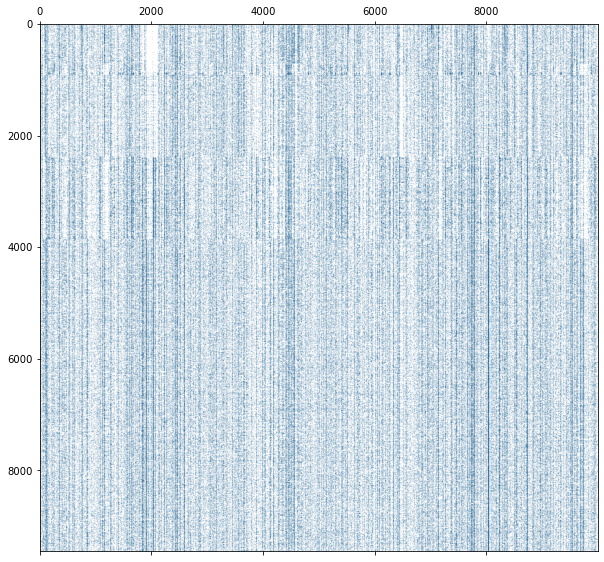

In [69]:
import scipy.sparse as sparse
plt.figure(figsize=(10,10))
plt.spy(tfidf_complete,markersize=0.015)

### Feature Selection 

In [70]:
x_train,x_test,y_train, y_test = train_test_split( dtf['Cleaned Abstract'], dtf['y'], test_size=0.3)

In [71]:
vect_word = TfidfVectorizer(max_features=10000, analyzer='word', stop_words='english', ngram_range=(1,2), dtype=np.float32)
train_tfidf = vect_word.fit_transform(x_train)
test_tfidf = vect_word.transform(x_test)

In [72]:
from sklearn.feature_selection import SelectKBest, chi2
def select_features(train_X, train_y, test_X, k):
    if k == 'all':
        return train_X, test_X

    selector = SelectKBest(chi2, k=k)
    selector.fit(train_X, train_y)
    train_X = selector.transform(train_X)
    test_X = selector.transform(test_X)
    return train_X, test_X

In [73]:
tfidf_train_final,tfidf_test_final = select_features(train_tfidf,y_train,test_tfidf,627) 

In [74]:
tfidf_train_final.shape

(6615, 627)

In [75]:
tfidf_test_final.shape

(2836, 627)

In [76]:
print(tfidf_train_final)

  (0, 55)	0.2630117
  (0, 354)	0.03787332
  (0, 177)	0.055087812
  (0, 14)	0.21341066
  (0, 54)	0.14541374
  (0, 305)	0.23590575
  (0, 162)	0.056132212
  (0, 165)	0.11286257
  (0, 102)	0.058286723
  (0, 304)	0.21444577
  (0, 459)	0.18727767
  (1, 576)	0.023959208
  (1, 95)	0.08339244
  (1, 69)	0.044190004
  (1, 110)	0.05407609
  (1, 414)	0.02808866
  (1, 378)	0.036335494
  (1, 436)	0.071767144
  (1, 570)	0.054185733
  (1, 155)	0.050986428
  (1, 409)	0.03728255
  (1, 28)	0.12173494
  (1, 608)	0.07537115
  (1, 504)	0.05940373
  (1, 245)	0.020066546
  :	:
  (6613, 477)	0.04805906
  (6613, 391)	0.043332517
  (6613, 205)	0.04885501
  (6613, 83)	0.31540656
  (6613, 308)	0.036614154
  (6613, 476)	0.033767894
  (6613, 390)	0.040521737
  (6613, 286)	0.0584419
  (6613, 108)	0.036823485
  (6613, 105)	0.021415493
  (6613, 45)	0.021615779
  (6613, 562)	0.028701786
  (6613, 509)	0.037954703
  (6613, 95)	0.030253084
  (6613, 110)	0.05885312
  (6613, 354)	0.019438684
  (6614, 344)	0.07140839
  (6614, 

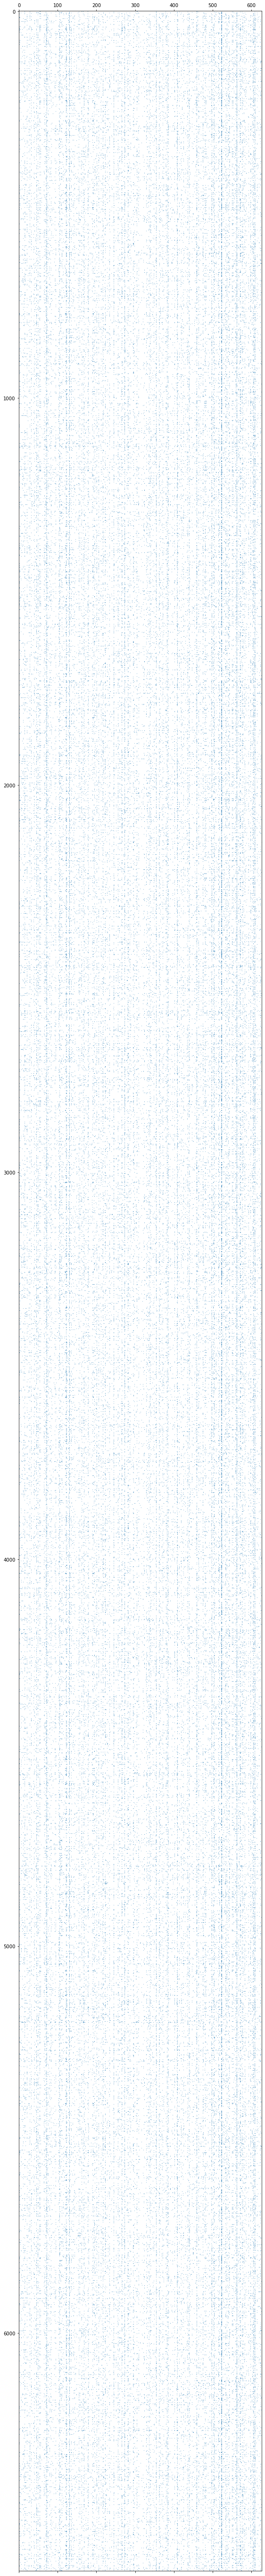

In [77]:
plt.figure(figsize=(20,100))
plt.spy(tfidf_train_final,markersize=0.15)

### Training and Testing of the Model

### SVM

In [78]:
linear_svc = LinearSVC(multi_class='ovr')
linear_svc.fit(tfidf_train_final,y_train)
predictions = linear_svc.predict(tfidf_test_final)
print ("Accuracy of this SVM = " + str(metrics.accuracy_score(y_test, predictions)))
print ("Confusion matrix = " + str(metrics.confusion_matrix(y_test, predictions)))

Accuracy of this SVM = 0.8293370944992948
Confusion matrix = [[  46   26    6]
 [   0 1110  244]
 [   2  206 1196]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73        78
           1       0.83      0.82      0.82      1354
           2       0.83      0.85      0.84      1404

    accuracy                           0.83      2836
   macro avg       0.87      0.75      0.80      2836
weighted avg       0.83      0.83      0.83      2836



### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(tfidf_train_final,y_train)
predictions = model.predict(tfidf_test_final)
print ("Accuracy of this KNN = " + str(metrics.accuracy_score(y_test, predictions)))
print ("Confusion matrix = " + str(metrics.confusion_matrix(y_test, predictions)))


Accuracy of this KNN = 0.7570521861777151
Confusion matrix = [[   8   58   12]
 [   1 1051  302]
 [   2  314 1088]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.10      0.18        78
           1       0.74      0.78      0.76      1354
           2       0.78      0.77      0.78      1404

    accuracy                           0.76      2836
   macro avg       0.75      0.55      0.57      2836
weighted avg       0.76      0.76      0.75      2836



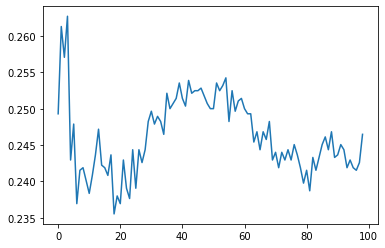

In [82]:
error_rates=[]
for i in np.arange(1, 100):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(tfidf_train_final,y_train)
    new_predictions = new_model.predict(tfidf_test_final)
    error_rates.append(np.mean(new_predictions != y_test))
plt.plot(error_rates)

In [87]:
model = KNeighborsClassifier(n_neighbors = 18)
model.fit(tfidf_train_final,y_train)
predictions = model.predict(tfidf_test_final)
print ("Accuracy of this KNN = " + str(metrics.accuracy_score(y_test, predictions)))
print ("Confusion matrix = " + str(metrics.confusion_matrix(y_test, predictions)))

Accuracy of this KNN = 0.7563469675599436
Confusion matrix = [[   4   56   18]
 [   0 1066  288]
 [   0  329 1075]]


### XGBoost 

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
xgbc = XGBClassifier()
xgbc.fit(tfidf_train_final,y_train)
scores = cross_val_score(xgbc, tfidf_train_final, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

C:\Users\Swathi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swathi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [86]:
predictions = xgbc.predict(tfidf_test_final)
print ("Accuracy of this XGBoost = " + str(metrics.accuracy_score(y_test, predictions)))
print ("Confusion matrix = " + str(metrics.confusion_matrix(y_test, predictions)))

Accuracy of this XGBoost = 0.8554301833568406
Confusion matrix = [[  63    8    7]
 [   5 1156  193]
 [   2  195 1207]]
